**Exercise: Modify this notebook to apply bayesian multilinear regression to boston housing dataset.**

**!! The execution took place in google colab**

Install the Bambi and pymc in Google Collab notebook.

In [ ]:
!pip install bambi
!pip install pymc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 KB 2.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Install the scikit-learn 1.1.3. Why the new version do not have the Boston housing model.

In [ ]:
!pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Install the library from the project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb
import pymc as pm
import arviz as az

Create a dataframe from dataset

In [ ]:
# Load the Boston Housing dataset
boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header=None, sep="\s+")
boston.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

Init the model

In [ ]:
# Define the model formula and data
formula = "MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT"
data = boston

# Create the Bambi model
model = bmb.Model(formula, data)


Using the Bayesian multilinear regression 

In [ ]:
# define priors
fitted = model.fit(draws=2000, idata_kwargs={"log_likelihood": True})
predict = model.predict(fitted, kind="pps")

Print the plot.

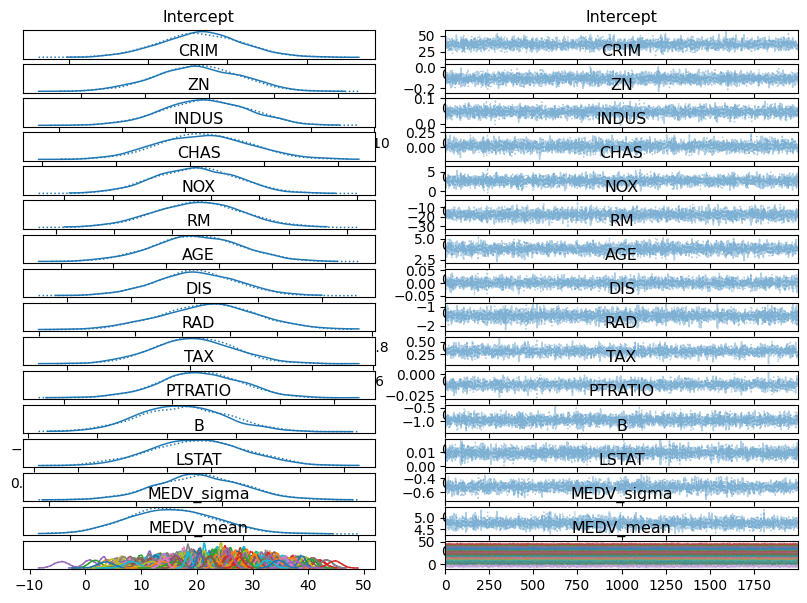

In [ ]:
az.plot_trace(fitted, figsize=(10, 7));

**Now make the algorithm again, but the model is my.**

Install the library from the project


In [ ]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

Load the Boston House dataset using the sklearn dataset library

In [ ]:
# Load the Boston Housing dataset
boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header=None, sep="\s+")
boston.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

Init the model

In [ ]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

Using the Bayesian multilinear regression.

In [ ]:
# Define model
with pm.Model() as model:
    # Define priors
    beta0 = pm.Normal('Intercept', mu=0, sigma=10)
    beta1 = pm.Normal('CRIM', mu=0, sigma=10)
    beta2 = pm.Normal('ZN', mu=0, sigma=10)
    beta3 = pm.Normal('INDUS', mu=0, sigma=10)
    beta4 = pm.Normal('CHAS', mu=0, sigma=10)
    beta5 = pm.Normal('NOX', mu=0, sigma=10)
    beta6 = pm.Normal('RM', mu=0, sigma=10)
    beta7 = pm.Normal('AGE', mu=0, sigma=10)
    beta8 = pm.Normal('DIS', mu=0, sigma=10)
    beta9 = pm.Normal('RAD', mu=0, sigma=10)
    beta10 = pm.Normal('TAX', mu=0, sigma=10)
    beta11 = pm.Normal('PTRATIO', mu=0, sigma=10)
    beta12 = pm.Normal('B', mu=0, sigma=10)
    beta13 = pm.Normal('LSTAT', mu=0, sigma=10)
    
    # Define linear model
    mu = beta0 + beta1*scaled_data['CRIM'] + beta2*scaled_data['ZN'] + beta3*scaled_data['INDUS'] \
         + beta4*scaled_data['CHAS'] + beta5*scaled_data['NOX'] + beta6*scaled_data['RM'] \
         + beta7*scaled_data['AGE'] + beta8*scaled_data['DIS'] + beta9*scaled_data['RAD'] \
         + beta10*scaled_data['TAX'] + beta11*scaled_data['PTRATIO'] + beta12*scaled_data['B']\
         + beta13*scaled_data['LSTAT']
    
    # Define likelihood
    sigma = pm.HalfNormal('MEDV', sigma=1)
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=scaled_data['MEDV'])
    
    # Sample from posterior
    trace = pm.sample(2000, tune=2000, chains=2)

Print the plot.

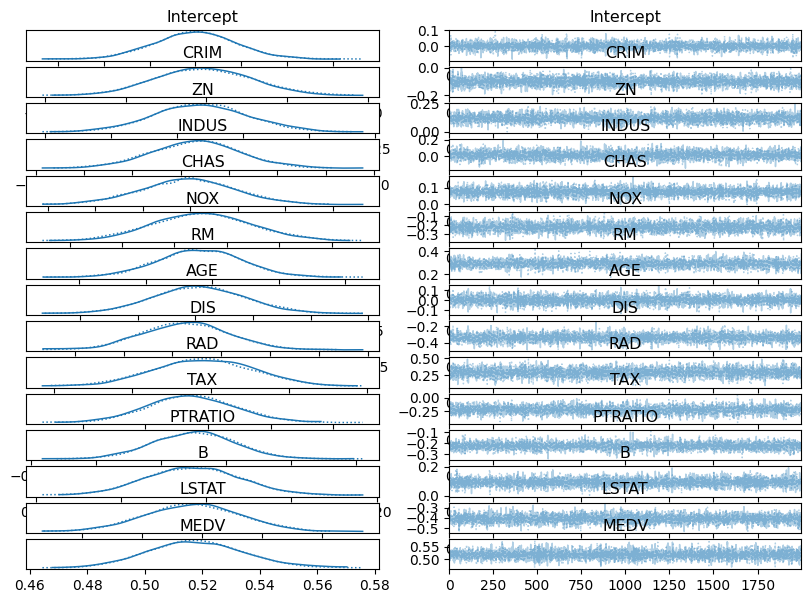

In [ ]:
az.plot_trace(trace, figsize=(10, 7));